[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/045_cv_tareas/cv_tareas.ipynb)

## Tareas de Visi√≥n Artificial

La visi√≥n artificial, visi√≥n por computador o *computer vision* (CV) se define como la disciplina cient√≠fica que se encarga del an√°lisis y extracci√≥n de informaci√≥n de im√°genes y v√≠deos. Como puedes imaginar, este campo tiene multitud de aplicaciones interesantes: conducci√≥n aut√≥noma, sistemas de diagn√≥stico m√©dico, rob√≥tica, videojuegos, etc. Multitud de algoritmos para diferentes tareas de visi√≥n artificial han sido desarrollados y aplicados con √©xito durante las √∫ltimas d√©cadas, sin embargo el resurgimiento de las `redes neuronales` (en particular las `redes neuronales convolucionales`) y su √©xito en el campo de la visi√≥n artifical ha dado como resultado avances importantes en muchas aplicaciones e incluso la aparici√≥n de nuevas tareas anteriormente inconcebibles. En este post vamos a presentar algunas de las tareas de visi√≥n artificial m√°s comunes que podemos resolver con `deep learning`, y en futuros posts iremos viendo como podemos llevarlas a cabo una a una.  

## Tipos de tareas

Existen much√≠simas tareas en el campo de la visi√≥n artificial: desde tareas tan simples como clasificar una imagen hasta otras m√°s ex√≥ticas como coloreas un imagen en blanco y negro o aumentar la resoluci√≥n de una imagen. Puedes encontrar una lista de tareas, junto a ejemplos de implementaci√≥n, en [paperswithcode](https://paperswithcode.com/area/computer-vision). En este post vamos a presentar las tareas m√°s simples que nos van a servir de introducci√≥n para aprender a resolver tareas de visi√≥n artificial con redes neuronales. Los conceptos aprendidos nos servir√°n para poder resolver tareas m√°s complicadas en el futuro.

![](https://miro.medium.com/proxy/1*nR5QCdmqUnvU2JFBu2Xa-Q.png)

### Clasificaci√≥n

La tarea de clasificaci√≥n de im√°genes es la m√°s sencilla, y de hecho ya la hemos llevado a cabo en varios posts anteriores. En esta tarea, nuestra red neuronal recibe una imagen a la entrada y a la salida nos dar√° una distribuci√≥n de probabilidad sobre todas las clases que consideremos. 

![](https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif)

### Localizaci√≥n

En la tarea de localizaci√≥n, nuestra red neuronal ser√° responsable de darnos 4 valores a la salida. Estos 4 valores representan una caja, o *bounding box*, que encierra al objeto principal presente en la imagen. Si comibamos esta tarea con la de clasificaci√≥n, no s√≥lo seremos capaces de reconocer un objeto sino de conocer tambi√©n en qu√© posici√≥n se encuentra dentro de la imagen. 

### Detecci√≥n de Objetos

Si bien en la tarea de localizaci√≥n + clasificaci√≥n podemos detectar el principal objeto presente en la imagen, la tarea de detecci√≥n de objetos nos va a permitir detectar un n√∫mero indeterminado de objetos en la imagen y no s√≥lo uno. Esta es una de las principales tareas llevadas a cabo por los coches aut√≥nomos, que necesitan identificar y localizar en el espacio a otros coches, peatones, ciclistas, sem√°foros, se√±ales de tr√°fico, etc. 

![](https://thumbs.gfycat.com/SociableAmazingApe-size_restricted.gif)

### Segmentaci√≥n

Esta tarea es similar que la de clasificaci√≥n pero llevada al extremos. Si bien en la tarea de clasificaci√≥n asignamos una etiqueta a la imagen, en la tarea de segmentaci√≥n se asigna una etiqueta a cada uno de los p√≠xeles de la imagen. As√≠ pues, la red neuronal nos dar√° a la salida otra imagen (con la misma resoluci√≥n que la imagen de la entrada) en la que tenemos una clase asignada a cada pixel. Si nuestra red permite, adem√°s, reconocer diferentes objetos de la misma categor√≠a, hablamos de `segmentaci√≥n sem√°ntica`.

![](https://thumbs.gfycat.com/DimSarcasticCockerspaniel-size_restricted.gif)

## Ejemplo de Clasificaci√≥n

Vamos a ver ahora un ejemplo de clasificaci√≥n de imagen utilizando `redes neuronales`. C√≥mo ya hemos comentado anteriormente, tienes muchos ejemplos de esta tarea en posts anteriores. Aqu√≠ vamos a ver c√≥mo clasificar im√°genes con el dataset MNIST utilizando `Pytorch`. 

En primer lugar vamos a descargar el dataset utilizando la librer√≠a `torchvision`, que nos ofrece datasets, modelos, transformaciones y operaciones comunes en el campo de la visi√≥n artificial.

In [1]:
import torch
import torchvision

dataset = {
    'train': torchvision.datasets.MNIST('./data', train=True, download=True, transform=torchvision.transforms.ToTensor()),
    'test': torchvision.datasets.MNIST('./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
}

len(dataset['train']), len(dataset['test'])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:00<00:00, 102186774.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 121622182.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:00<00:00, 24919616.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 15783370.98it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(60000, 10000)

In [2]:
# dataset['train'][0][0][0][:][:]
# dataset['train'][0]
img, label = dataset['train'][1]
print(img)
print(img.shape)
img.squeeze(0)
print(img)
print(img.shape)


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

En cualquier tarea de visi√≥n artificial es recomendable visualizar ejemplos de im√°genes en el dataset para hacernos una idea del tipo de datos con el que trabajamos y las diferentes categor√≠as.

torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


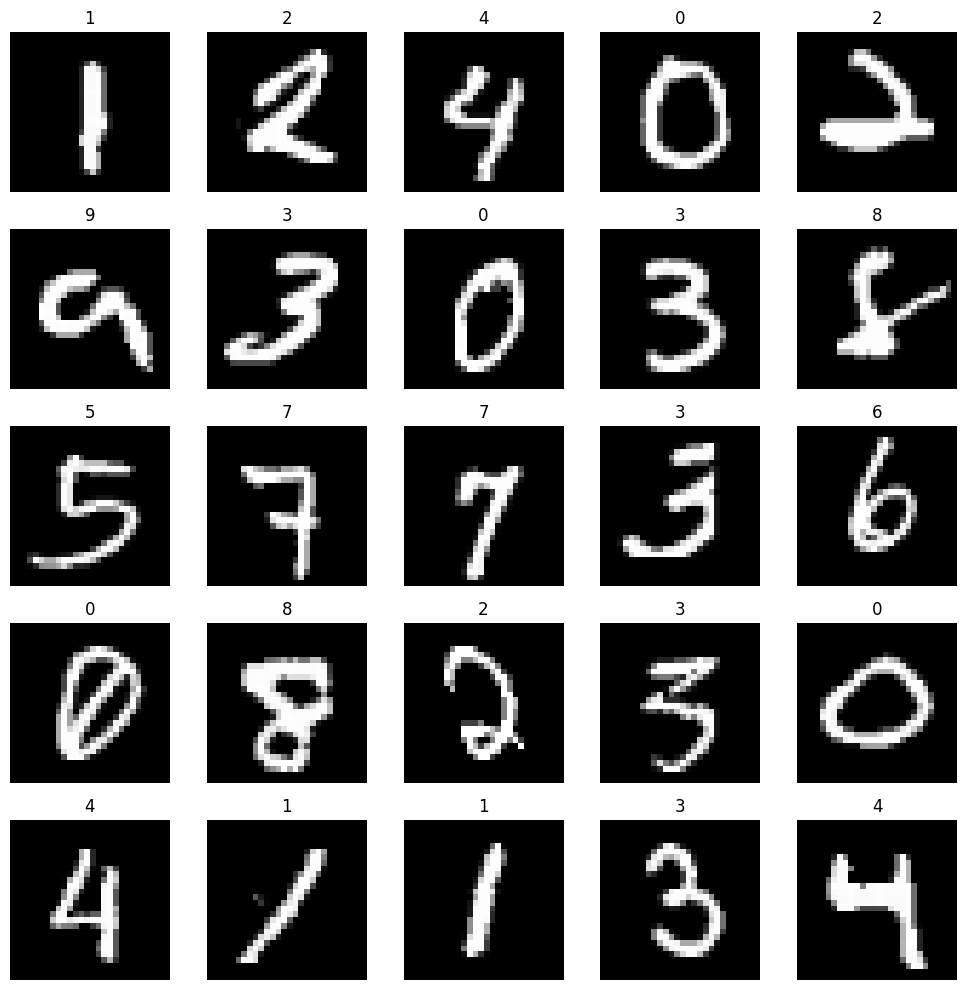

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 

r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['train'])-1)
        img, label = dataset['train'][ix]
        plt.imshow(img.squeeze(0), cmap='gray')
        # plt.imshow(img, cmap='gray')
        print(img.squeeze(0).shape)
        plt.axis("off")
        plt.title(label)
plt.tight_layout()
plt.show()

In [4]:
img.shape, img.dtype, img.max(), img.min()

(torch.Size([1, 28, 28]), torch.float32, tensor(1.), tensor(0.))

Como puedes ver tenemos im√°genes de d√≠gitos manuscritos, y el objetivo es el da asignar una etiqueta a cada imagen que corresponda con el d√≠gito presente en ella. Esto lo conseguimos haciendo que nuestra red neuronal nos de 10 valores a la salida, que representa una distribuci√≥n de probabilidad sobre todas las clases. Dada una imagen, le asignaremos la etiqueta correspondiente al valor m√°s grande a la salida.

In [5]:
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 64)
    self.conv2 = block(64, 128)
    self.fc = torch.nn.Linear(128*7*7, n_outputs)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

In [6]:
model = CNN()
output = model(torch.randn(64, 1, 28, 28))
print(output.shape)
print(output)

torch.Size([64, 10])
tensor([[ 0.2800, -0.3598, -0.2777, -0.1651, -0.0211,  0.0871,  0.0506, -0.3944,
          0.1310, -0.3703],
        [-0.0029, -0.1996, -0.3187, -0.2814,  0.0009,  0.1119,  0.0094, -0.3731,
          0.1187, -0.2486],
        [ 0.0500, -0.1669, -0.2709, -0.2754,  0.1618,  0.3063,  0.0665, -0.4663,
          0.1502, -0.3979],
        [ 0.1126,  0.0031, -0.1646, -0.3912,  0.0585,  0.1742,  0.1294, -0.3838,
          0.0313, -0.3839],
        [ 0.2199, -0.3050, -0.1796, -0.4048,  0.0309,  0.1483,  0.1686, -0.3571,
          0.1306, -0.2188],
        [ 0.2627, -0.2481, -0.3455, -0.2279,  0.1281,  0.1497,  0.0618, -0.2453,
          0.0790, -0.4327],
        [ 0.1899, -0.3107, -0.2356, -0.3193, -0.0065,  0.1006,  0.1298, -0.3992,
          0.0625, -0.3692],
        [ 0.2580, -0.0871, -0.2467, -0.3334, -0.0182,  0.1829,  0.1080, -0.3710,
          0.0983, -0.2309],
        [ 0.1185, -0.2448, -0.1535, -0.2177, -0.0203,  0.2033,  0.0417, -0.3230,
          0.0955, -0.3119]

> üí° En posts anteriores hemos hablado en detalle sobre `redes neuronales convolucionales`, as√≠ que si no entiendes bien lo que estamos haciendo en el modelo anterior te recomendamos que les eches un vistazo.

Durante el entrenamiento de nuestra red compararemos la salida del modelo con la etiqueta real utilizando una funci√≥n de p√©rdida de tipo *CrossEntropy* y actualizaremos los pesos de forma que el error se reduzca tras cada iteraci√≥n.

![](https://thumbs.gfycat.com/SmoggyLittleFlickertailsquirrel-size_restricted.gif)

In [7]:
from tqdm import tqdm
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [8]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=64, shuffle=False, pin_memory=True)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 1, 28, 28])

In [9]:
model = CNN()
fit(model, dataloader)

val_loss 0.04773 val_acc 0.98418: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157/157 [00:02<00:00, 64.13it/s]


Epoch 1/5 loss 0.13934 val_loss 0.04773 acc 0.95801 val_acc 0.98418


val_loss 0.03323 val_acc 0.98855: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157/157 [00:02<00:00, 71.99it/s]


Epoch 2/5 loss 0.04465 val_loss 0.03323 acc 0.98616 val_acc 0.98855


val_loss 0.03206 val_acc 0.98915: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157/157 [00:02<00:00, 63.08it/s]


Epoch 3/5 loss 0.03148 val_loss 0.03206 acc 0.98986 val_acc 0.98915


val_loss 0.03689 val_acc 0.98716: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157/157 [00:02<00:00, 73.13it/s]


Epoch 4/5 loss 0.02293 val_loss 0.03689 acc 0.99270 val_acc 0.98716


val_loss 0.03033 val_acc 0.98965: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157/157 [00:02<00:00, 57.77it/s]

Epoch 5/5 loss 0.01820 val_loss 0.03033 acc 0.99437 val_acc 0.98965


Una vez nuestro modelo ha sido entrenado podemos utilizarlo para generar predicciones en los datos de test (no vistos durante el entrenamiento) y evaluar los puntos d√©biles de nuestro modelo.

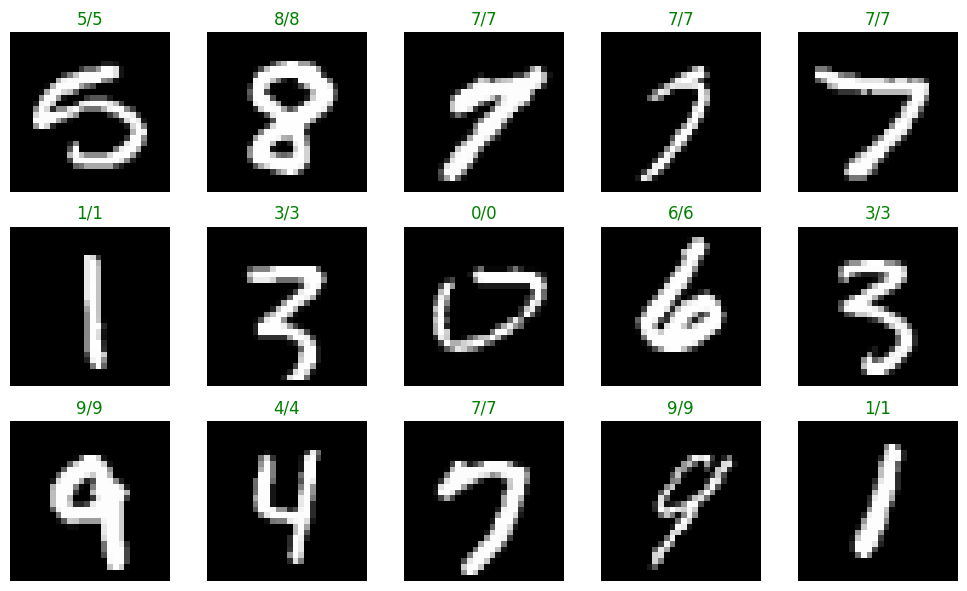

In [10]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test'])-1)
        img, label = dataset['test'][ix]
        preds = model(img.unsqueeze(0).to(device))
        pred = torch.argmax(preds, axis=1)[0].item()
        plt.imshow(img.squeeze(0), cmap='gray')
        plt.axis("off")
        plt.title(f'{label}/{pred}', color = "red" if label != pred else "green")
plt.tight_layout()
plt.show()

> ‚ö° Existen muchas formas de evaluar un clasificador, puedes encontrar m√°s sobre este tema en el siguiente [post](https://sensioai.com/blog/016_metricas_clasficiacion).

Ahora que ya sabes como hacer un clasificador de im√°genes con el dataset MNIST, ¬øte ves capaz de hacer clasificadores para otros datasets? [Aqu√≠](https://pytorch.org/docs/stable/torchvision/datasets.html) tienes unos cuantos con los que empezar a jugar.

## Resumen

En este psot hemos presentado las principales tareas del campo de la visi√≥n artificial. Este campo ha vivido un resurgimiento en los a√±os recientes gracias al *boom* del `deep learning` ya que las `redes neuronales convolucionales` son capaces de llevar a cabo muchas tareas con buenas prestaciones e incluso nuevas tareas han aparecido gracias a esta tecnolog√≠a. Hemos visto un ejemplo de la tarea m√°s sencilla: la clasificaci√≥n de im√°genes, en la que simplemente tenemos que asignar una etiqueta dada una imagen. En futuros posts veremos otras tareas m√°s interesantes como la detecci√≥n de objetos o la segmentaci√≥n de im√°genes.